<b><center><font color='Brown' style='font-family:Roboto Slab; font-size:25px;'>Movie Recommendation System</font></center></b><br>
<hr style="color:blue; height:1px;">
<font color='navy' style='font-family:Cambria; font-size:25px;'>Problem Statement:</font>

## Project Purpose:
The purpose of this project is to build a Content-Based Movie Recommendation System. This system aims to suggest movies to users based on similarities in movie content such as genres, keywords, cast, and crew. It helps users discover movies that match their interests without relying on collaborative filtering.

## Data Used:
- **Movies Data (`tmdb_5000_movies.csv`):**<br>
  Contains information about movies, including genres, keywords, cast, and crew.
<br>
- **Credits Data (`tmdb_5000_credits.csv`):**<br>
  Contains information about the cast and crew of the movies.

## Data Preprocessing:
- Merged movies and credits data on the basis of the title.
- Dropped unnecessary columns to focus on relevant information.
- Handled missing values by dropping rows with missing overviews.
- Converted complex columns (like genres, keywords, and cast) into lists of names for easier processing.
- Removed spaces from names to prevent confusion in tag creation.
- Combined features into a single 'tags' column, which represents the movie's content.

## Feature Engineering:
- Processed text data by applying stemming to standardize words.
- Used Count Vectorization to transform text data into numerical vectors for model input.

## Model Building:
- Created a similarity matrix using Cosine Similarity to measure the similarity between movies based on their content.

## Recommendation Function:
- Developed a function to recommend movies similar to a given movie based on content similarity.
- Saved the processed data, movie dictionary, and similarity matrix using pickle for future use.

## Serialization:
- Used pickle to save the processed data and similarity calculations so the model can be easily loaded and used without reprocessing.



## <b><font color='navy'> Step 1 : Understanding And Exploration </font></b>

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
# reading data
movies=pd.read_csv('tmdb_5000_movies.csv')
credits=pd.read_csv("tmdb_5000_credits.csv")

In [3]:
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [4]:
credits.head(2)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [5]:
# merging  movies and credits on the basis of title
movies=movies.merge(credits,on='title')

In [6]:
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [7]:
# lets check shape
movies.shape

(4809, 23)

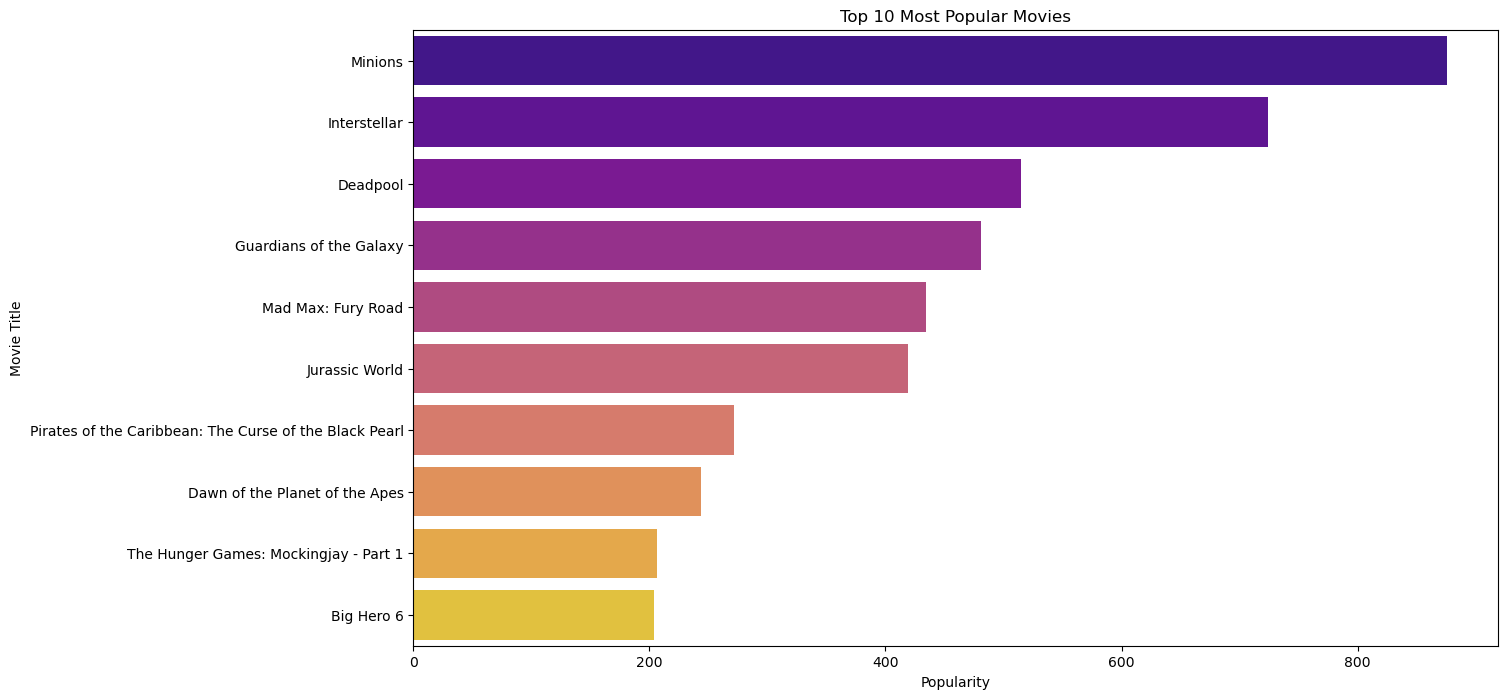

In [8]:
# Visualization of Most Popular Movies
top_movies = movies.sort_values(by='popularity', ascending=False).head(10)

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(x='popularity', y='title', data=top_movies, palette='plasma')
plt.title('Top 10 Most Popular Movies')
plt.xlabel('Popularity')
plt.ylabel('Movie Title')
plt.show()

## <b><font color='BROWN'>Step 2:Data Preparation And Preproccessing  </font></b>

In [9]:
# lets drop unnecessary columns and keep only neccesary one
movies=movies[["movie_id","title","genres",'keywords',"overview","cast","crew"]]

In [10]:
movies.head(3)

,movie_id,title,genres,keywords,overview,cast,crew
0,19995,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","Captain Barbossa, long believed to be dead, ha...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",A cryptic message from Bond’s past sends him o...,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [11]:
# dropping null values
movies.isnull().sum()

movie_id    0
title       0
genres      0
keywords    0
overview    3
cast        0
crew        0
dtype: int64

In [12]:
# so we have 3 null values in overviews so we drop those 3
movies.dropna(inplace=True)

In [13]:
# so we want only names in genres, keywords ,cast
# so i create a function
def convert(col):
    z=[]
    for i in ast.literal_eval(col):
        z.append(i['name'])
    return z
    

In [14]:
movies['genres']=movies['genres'].apply(convert)

In [15]:
movies['keywords']=movies['keywords'].apply(convert)

In [16]:
movies.head()

,movie_id,title,genres,keywords,overview,cast,crew
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","Captain Barbossa, long believed to be dead, ha...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",A cryptic message from Bond’s past sends him o...,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",Following the death of District Attorney Harve...,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","John Carter is a war-weary, former military ca...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [17]:
def convert1(col):
    z=[]
    count=0
    for i in ast.literal_eval(col):
        if count!=3:
            z.append(i['name'])
            count=+1
        else:
            break
    return z   

In [18]:
movies['cast']=movies['cast'].apply(convert1)

In [19]:
movies.head()

,movie_id,title,genres,keywords,overview,cast,crew
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di...","[Sam Worthington, Zoe Saldana, Sigourney Weave...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","Captain Barbossa, long believed to be dead, ha...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",A cryptic message from Bond’s past sends him o...,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",Following the death of District Attorney Harve...,"[Christian Bale, Michael Caine, Gary Oldman, A...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","John Carter is a war-weary, former military ca...","[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [20]:
def direct(col):
    A=[]
    for i in ast.literal_eval(col):
        if i['job']=='Director':
            A.append(i['name'])
    return A

In [21]:
movies['crew'].apply(direct)

0                                [James Cameron]
1                               [Gore Verbinski]
2                                   [Sam Mendes]
3                            [Christopher Nolan]
4                               [Andrew Stanton]
                          ...                   
4804                          [Robert Rodriguez]
4805                              [Edward Burns]
4806                               [Scott Smith]
4807                               [Daniel Hsia]
4808    [Brian Herzlinger, Jon Gunn, Brett Winn]
Name: crew, Length: 4806, dtype: object

In [22]:
movies['crew']=movies['crew'].apply(direct)

In [23]:
movies.head(2)

,movie_id,title,genres,keywords,overview,cast,crew
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di...","[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","Captain Barbossa, long believed to be dead, ha...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...",[Gore Verbinski]


In [24]:
# we want overview in a list
movies['overview']=movies['overview'].apply(lambda x:x.split())

In [25]:
movies.head(1)

,movie_id,title,genres,keywords,overview,cast,crew
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[In, the, 22nd, century,, a, paraplegic, Marin...","[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron]


In [26]:
# we have to remove spaces between names bcoz it confuses us while creating tags 
movies['genres']=movies['genres'].apply(lambda x:[i.replace(" ","") for i in x])
movies['keywords']=movies['keywords'].apply(lambda x:[i.replace(" ","") for i in x])
movies['cast']=movies['cast'].apply(lambda x:[i.replace(" ","") for i in x])
movies['crew']=movies['crew'].apply(lambda x:[i.replace(" ","") for i in x])

In [27]:
movies['tags']=movies['overview']+movies['genres']+movies['keywords']+movies['cast']+movies['crew']

In [28]:
movies['tags']

0       [In, the, 22nd, century,, a, paraplegic, Marin...
1       [Captain, Barbossa,, long, believed, to, be, d...
2       [A, cryptic, message, from, Bond’s, past, send...
3       [Following, the, death, of, District, Attorney...
4       [John, Carter, is, a, war-weary,, former, mili...
                              ...                        
4804    [El, Mariachi, just, wants, to, play, his, gui...
4805    [A, newlywed, couple's, honeymoon, is, upended...
4806    ["Signed,, Sealed,, Delivered", introduces, a,...
4807    [When, ambitious, New, York, attorney, Sam, is...
4808    [Ever, since, the, second, grade, when, he, fi...
Name: tags, Length: 4806, dtype: object

In [29]:
movies['tags']=movies['tags'].apply(lambda x:" ".join(x))

In [30]:
movies['tags']=movies['tags'].apply(lambda x:x.lower())

In [31]:
movies.head(1)

,movie_id,title,genres,keywords,overview,cast,crew,tags
0,19995,Avatar,"[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[In, the, 22nd, century,, a, paraplegic, Marin...","[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",[JamesCameron],"in the 22nd century, a paraplegic marine is di..."


In [32]:
new_movies=movies[['movie_id','title','tags']]

In [33]:
new_movies.head(2)

,movie_id,title,tags
0,19995,Avatar,"in the 22nd century, a paraplegic marine is di..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha..."


## <b><font color='navy'>Step:4. Data Visualisation</font></b>

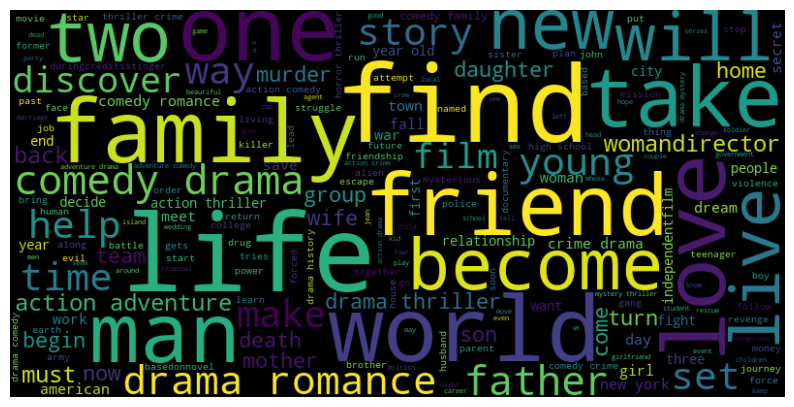

In [34]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(' '.join(new_movies['tags']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

- <b><font color= 'brown' style = 'font-family:Cambria ; font-size:18px'>Word cloud showing the most common words in the tags. The size of each word is proportional to its frequency in the dataset. </font><br></b>
<br>
- <b><font color= 'brown' style = 'font-family:Cambria ; font-size:18px'>These visualizations can help you understand the distribution of genres and keywords in the dataset, which can be useful for evaluating the performance of the recommendation model. </font><br></b>

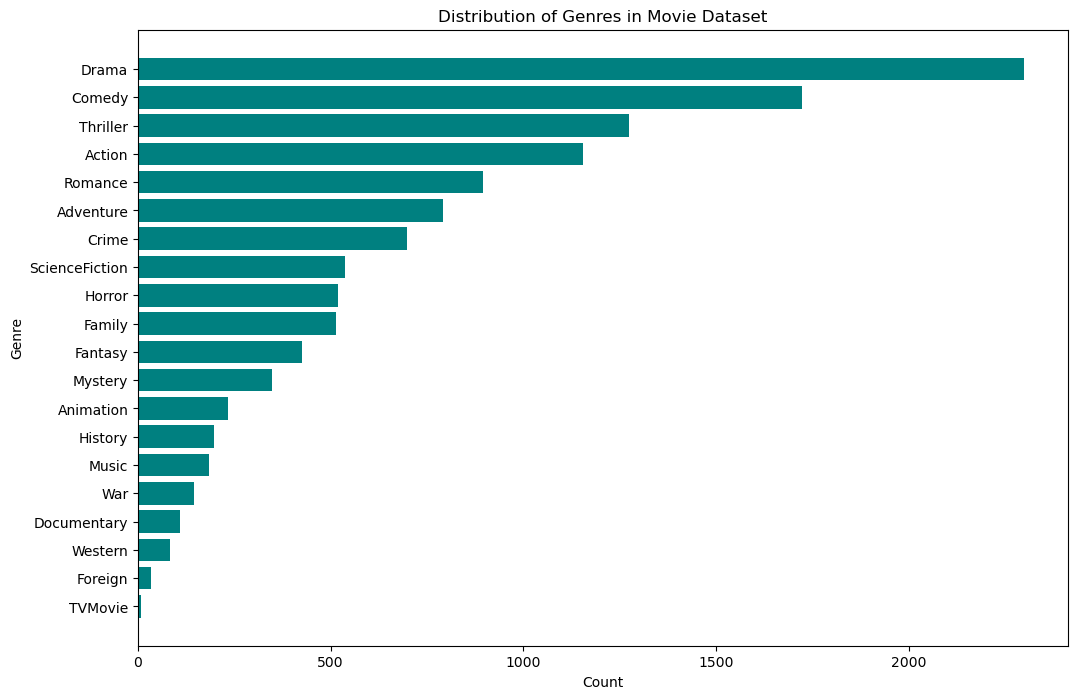

In [35]:
# Distribution of Genres in Movie Dataset
# Flatten the list of genres and count their occurrences
from collections import Counter

# Flatten genre lists
all_genres = [genre for sublist in movies['genres'] for genre in sublist]
genre_counts = Counter(all_genres)

# Create a DataFrame for plotting
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count'])
genre_df = genre_df.sort_values(by='Count', ascending=False)

# Plot the distribution of genres
plt.figure(figsize=(12, 8))
plt.barh(genre_df['Genre'], genre_df['Count'], color='teal')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Distribution of Genres in Movie Dataset')
plt.gca().invert_yaxis()  # To display the highest counts at the top
plt.show()

<b><font color= 'navy' style = 'font-family:Cambria ; font-size:18px'>The genre distribution visualization helps us understand the variety and frequency of different movie genres present in the dataset. This can provide insights into the most popular genres and how they are represented in the data. we can obverse from above is we have more `Drama` and `Comedy` movies in dataset </font><br></b>`

## <b><font color='BROWN'>Step:4. Feature Engineering And Vectorization</font></b>

In [36]:
import nltk

In [37]:
#  The goal of stemming is to normalize words to a common form, so that words with the same meaning but different grammatical
# forms can be treated as the same word.
from nltk.stem import PorterStemmer
ps=PorterStemmer()

In [38]:
def stemming(text):
    z=[]
    for i in text.split():
        z.append(ps.stem(i))
    return " ".join(z)

In [39]:
new_movies['tags']=new_movies['tags'].apply(stemming)

C:\Users\zebaf\AppData\Local\Temp\ipykernel_6552\4030765832.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_movies['tags']=new_movies['tags'].apply(stemming)


In [40]:
new_movies["title"]

0                                         Avatar
1       Pirates of the Caribbean: At World's End
2                                        Spectre
3                          The Dark Knight Rises
4                                    John Carter
                          ...                   
4804                                 El Mariachi
4805                                   Newlyweds
4806                   Signed, Sealed, Delivered
4807                            Shanghai Calling
4808                           My Date with Drew
Name: title, Length: 4806, dtype: object

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=5000,stop_words='english')

In [42]:
vectors=cv.fit_transform(new_movies['tags']).toarray()

In [43]:
vectors[2]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [44]:
# By default, NumPy arrays truncate the display of values when there are too many to fit in a single line.
# To display all the values, you can use the set_printoptions function from NumPy to increase the threshold for displaying 
# values.
# np.set_printoptions(threshold=np.inf)

In [45]:
cv.get_feature_names_out()

array(['000', '007', '10', ..., 'zoo', 'zooeydeschanel', 'zoëkravitz'],
      dtype=object)

In [46]:
# we can observe above that the data is in stemmed form 

In [47]:
# we have to do cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

In [48]:
similarity=cosine_similarity(vectors)

In [49]:
# shape of a similaryty
similarity.shape

(4806, 4806)

In [50]:
similarity[1]

array([0.06666667, 1.        , 0.07559289, ..., 0.02108185, 0.        ,
       0.02222222])

In [51]:
# now we have to create recommed system function
def recommend(movie):
    movie_index=new_movies[new_movies['title']==movie].index[0]
    distance=similarity[movie_index]
    movie_list=sorted(list(enumerate(distance)),reverse=True,key=lambda x:x[1])[1:6]
    
    for i in movie_list:
        print(new_movies.iloc[i[0]].title)
    

In [52]:
# we can see below how reccomend works
recommend('Superman')

Superman II
Superman Returns
Superman IV: The Quest for Peace
Superman III
Iron Man 2


## <b><font color='navy'>Step:5.Serialization</font></b>

In [53]:
import pickle

In [54]:
pickle.dump(new_movies,open("movies.pkl",'wb'))

In [55]:
pickle.dump(new_movies.to_dict(),open("movie_dict.pkl",'wb'))

In [56]:
pickle.dump(similarity,open("similarity.pkl",'wb'))

# <b><font color='brown' style='font-family: Roboto Slab'>Conclusion:</font></b><br>

The implemented content-based movie recommendation system demonstrates a comprehensive approach to suggesting movies based on their content similarity. The key steps and outcomes of the project are summarized below:

<ul>
    <li><b>Data Processing:</b> The dataset was carefully processed to extract meaningful features such as genres, keywords, cast, and crew. Data cleaning and transformation techniques ensured the accuracy and usability of the data.</li>
    <li><b>Tag Creation:</b> A unified 'tags' column was created by combining and normalizing various text features. This consolidation facilitated more effective comparison between movies.</li>
    <li><b>Text Vectorization:</b> Count Vectorization was applied to convert text data into numerical format. This step enabled the calculation of similarities between movies.</li>
    <li><b>Cosine Similarity:</b> The cosine similarity metric was used to measure the similarity between movie vectors, aiding in the generation of recommendations based on content similarity.</li>
    <li><b>Recommendation Function:</b> A recommendation function was developed to suggest movies similar to a given input movie. This function utilizes the precomputed similarity scores to provide relevant movie suggestions.</li>
    <li><b>Serialization:</b> The final model and data were serialized using pickle, ensuring that the recommendation system can be easily loaded and utilized for future use without needing to reprocess the data.</li>
</ul>

Overall, the system effectively generates movie recommendations by leveraging content-based features, providing a valuable tool for users seeking movie suggestions aligned with their interests. The approach ensures that recommendations are tailored to the specific attributes of the movies, enhancing the relevance and quality of suggestions.


<b><font color='navy' style='font-family: Cambria; font-size:25px'>Key Observations from the Recommendation System:</font></b>

<ul>
    <li><b>Genre Distribution:</b> The distribution of genres in the dataset reveals the most prevalent genres in the movie collection. This insight helps in understanding which genres are most common and can influence the recommendation results.</li>
    <li><b>Effective Tag Combination:</b> Combining genres, keywords, cast, crew, and overview into a single 'tags' column allows for a more holistic representation of movie content. This comprehensive tagging improves the accuracy of similarity calculations.</li>
    <li><b>Impact of Stemming:</b> Stemming reduces words to their root forms, which helps in normalizing variations of words and improves the consistency of text data. This process is crucial for effective similarity measurement.</li>
    
    
These observations highlight the strengths and effectiveness of the content-based recommendation system, demonstrating its ability to provide relevant and personalized movie suggestions based on the content of the movies.


In [57]:
# down we have overview for the app in pycharm

<b><center><font color='brown' style='font-family: Roboto Slab; font-size:30px'>Movie Recommender System App</font></center></b><br>
<hr style="color: navy; height: 1px;">

<font color='navy' style='font-family: Cambria; font-size:25px'>Purpose:</font>

The Movie Recommender System app is designed to suggest movies similar to a selected movie based on content-based filtering. This system uses movie metadata such as genres, keywords, cast, and crew to recommend films that are likely to be of interest to users based on their input.

<font color='navy' style='font-family: Cambria; font-size:25px'>Functionality:</font>

**Inputs:**
- **Selected Movie:** Choose a movie from the dropdown menu to get recommendations.

**Calculations:**
- **Similarity Calculation:** Utilizes cosine similarity to measure the similarity between movies based on their content tags.

**Recommendation:**
- **Fetch Posters:** Retrieves movie posters using the Movie Database API.
- **Display Recommendations:** Shows the names and posters of the top 5 similar movies.

<font color='navy' style='font-family: Cambria; font-size:25px'>Usage:</font>

1. **Select Movie:** Choose a movie from the dropdown menu provided on the app.
2. **Show Recommendations:** Click the "Show Recommendation" button to display a list of recommended movies similar to the selected movie.
3. **View Results:** Recommended movies will be shown with their names and posters.

<font color='navy' style='font-family: Cambria; font-size:25px'>Example Output:</font>

- The app displays the names and posters of five movies that are most similar to the selected movie, allowing users to explore films with similar content.

<b><font color='brown' style='font-family: Cambria; font-size:20px'>Important Note:</font></b>
- Ensure that the correct files `movie_dict.pkl` and `similarity.pkl` are available and properly loaded.
- To run the app, use the command `streamlit run app.py` in your terminal.

This app provides an engaging way to discover new movies based on the content of movies you already enjoy.
